# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [131]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [132]:
# Set the API base URL
baseurl = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{baseurl}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | golfito
Processing Record 3 of Set 1 | zheleznogorsk-ilimskiy
Processing Record 4 of Set 1 | vorkuta
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | miranda
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | naze
Processing Record 9 of Set 1 | nova sintra
Processing Record 10 of Set 1 | forster
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | kasongo
Processing Record 13 of Set 1 | strelka
Processing Record 14 of Set 1 | brezina
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | ewo
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | boguchany
Processing Record 22 of Set 1 | albany
Processi

Processing Record 39 of Set 4 | hermanus
Processing Record 40 of Set 4 | yirol
City not found. Skipping...
Processing Record 41 of Set 4 | princeville
Processing Record 42 of Set 4 | ornskoldsvik
Processing Record 43 of Set 4 | vilyuchinsk
Processing Record 44 of Set 4 | polyarnyy
Processing Record 45 of Set 4 | cuddalore
Processing Record 46 of Set 4 | arar
Processing Record 47 of Set 4 | cockburn town
Processing Record 48 of Set 4 | quang ngai
Processing Record 49 of Set 4 | jean-rabel
Processing Record 0 of Set 5 | santa cruz
Processing Record 1 of Set 5 | fort-shevchenko
Processing Record 2 of Set 5 | cabo san lucas
Processing Record 3 of Set 5 | vanimo
Processing Record 4 of Set 5 | cuneo
Processing Record 5 of Set 5 | spas-klepiki
Processing Record 6 of Set 5 | carnarvon
Processing Record 7 of Set 5 | arteche
Processing Record 8 of Set 5 | sittwe
Processing Record 9 of Set 5 | nagqu
Processing Record 10 of Set 5 | yagry
City not found. Skipping...
Processing Record 11 of Set 5 | 

Processing Record 25 of Set 8 | fortuna
Processing Record 26 of Set 8 | norfolk
Processing Record 27 of Set 8 | gagliano del capo
Processing Record 28 of Set 8 | ocean pointe
City not found. Skipping...
Processing Record 29 of Set 8 | santa rosa del sara
City not found. Skipping...
Processing Record 30 of Set 8 | hamilton
Processing Record 31 of Set 8 | maceio
Processing Record 32 of Set 8 | borogontsy
Processing Record 33 of Set 8 | la huacana
Processing Record 34 of Set 8 | sos'va
Processing Record 35 of Set 8 | jiwani
Processing Record 36 of Set 8 | wenchang
Processing Record 37 of Set 8 | viligili
City not found. Skipping...
Processing Record 38 of Set 8 | dorado
Processing Record 39 of Set 8 | stjordalshalsen
Processing Record 40 of Set 8 | khandyga
Processing Record 41 of Set 8 | kulia village
City not found. Skipping...
Processing Record 42 of Set 8 | ruelle-sur-touvre
Processing Record 43 of Set 8 | batticaloa
Processing Record 44 of Set 8 | luderitz
Processing Record 45 of Set

Processing Record 11 of Set 12 | sola
Processing Record 12 of Set 12 | reggane
Processing Record 13 of Set 12 | nema
Processing Record 14 of Set 12 | koryazhma
Processing Record 15 of Set 12 | gadzhiyevo
Processing Record 16 of Set 12 | kharp
Processing Record 17 of Set 12 | wayne
Processing Record 18 of Set 12 | st. john's
Processing Record 19 of Set 12 | taesal-li
Processing Record 20 of Set 12 | hirara
Processing Record 21 of Set 12 | mandera
Processing Record 22 of Set 12 | woodward
Processing Record 23 of Set 12 | faulquemont
Processing Record 24 of Set 12 | vila velha
Processing Record 25 of Set 12 | pingnan
Processing Record 26 of Set 12 | dhidhdhoo
Processing Record 27 of Set 12 | ganshui
Processing Record 28 of Set 12 | zaragoza
Processing Record 29 of Set 12 | xiongzhou
Processing Record 30 of Set 12 | salaqi
Processing Record 31 of Set 12 | larkird
Processing Record 32 of Set 12 | al ghayzah
Processing Record 33 of Set 12 | broome
Processing Record 34 of Set 12 | bayganin
Pr

In [133]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [134]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,2.18,96,60,0.73,GS,1699738390
1,golfito,8.6390,-83.1660,26.27,93,100,0.92,CR,1699738882
2,zheleznogorsk-ilimskiy,56.5768,104.1217,-14.24,95,17,1.34,RU,1699738882
3,vorkuta,67.5000,64.0000,-6.61,97,100,3.83,RU,1699738882
4,miranda,3.2499,-76.2281,30.07,84,85,0.91,CO,1699738883


In [135]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.18,96,60,0.73,GS,1699738390
1,golfito,8.6390,-83.1660,26.27,93,100,0.92,CR,1699738882
2,zheleznogorsk-ilimskiy,56.5768,104.1217,-14.24,95,17,1.34,RU,1699738882
3,vorkuta,67.5000,64.0000,-6.61,97,100,3.83,RU,1699738882
4,miranda,3.2499,-76.2281,30.07,84,85,0.91,CO,1699738883


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

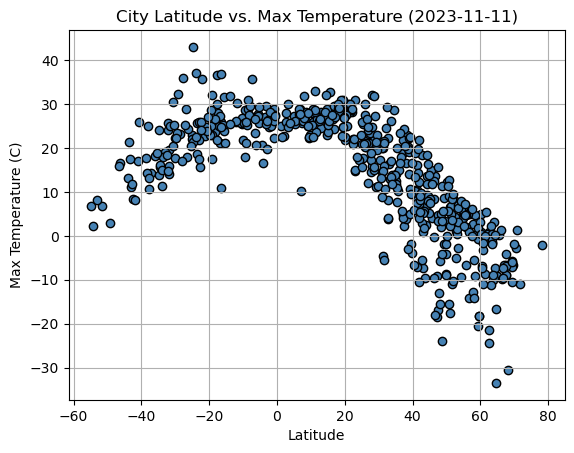

In [4]:
# Build scatter plot for latitude vs. temperature
import datetime
dt = datetime.datetime.fromtimestamp(city_data_df['Date'].max())
date_formatted = f"{dt.year}-{dt.month}-{dt.day}"
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="steelblue", edgecolors="black");
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({date_formatted})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/ScatterPlots/LatvsTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

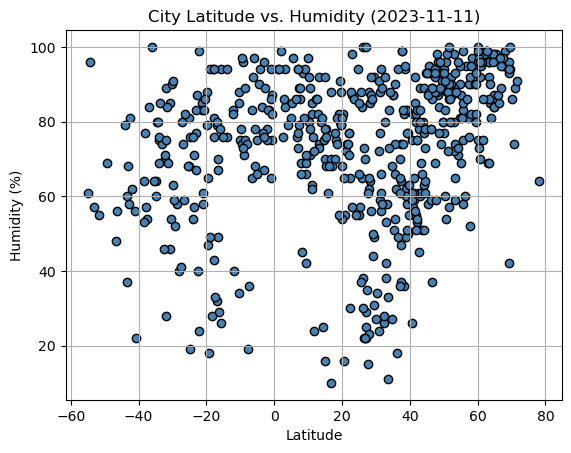

In [5]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="steelblue", edgecolors="black");
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date_formatted})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/ScatterPlots/LatvsHumidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

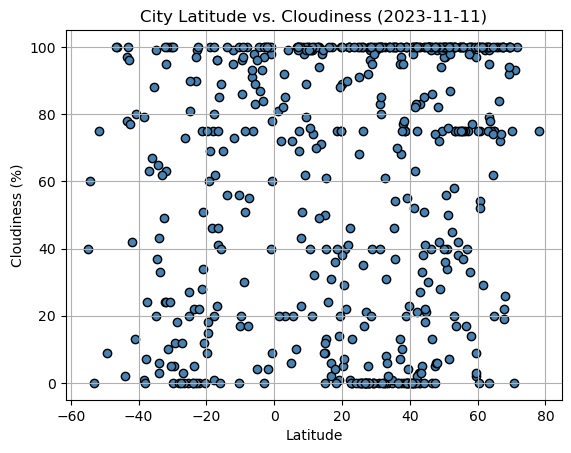

In [162]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="steelblue", edgecolors="black");
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date_formatted})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/ScatterPlots/LatvsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

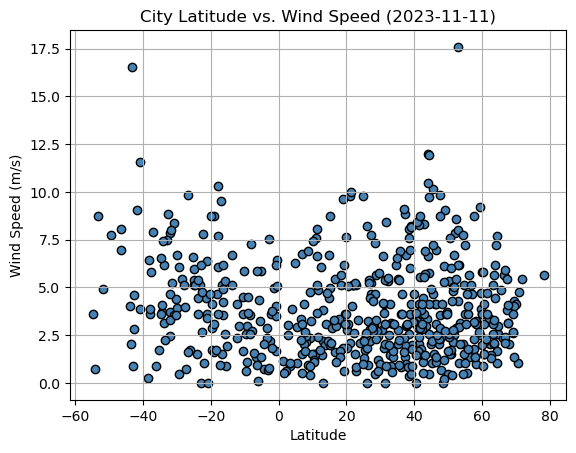

In [6]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="steelblue", edgecolors="black");
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date_formatted})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/ScatterPlots/LatvsWindspeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [164]:
# Define a function to create Linear Regression plots
def regression (x_values, y_values, xlabel, ylabel, title, coords,filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coords,fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f"output_data/Regressions/{filename}.png")
    plt.show()

In [165]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]
northern_hemi_df.to_csv("output_data/northern_hemi_data.csv", index_label="City_ID")
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,golfito,8.6390,-83.1660,26.27,93,100,0.92,CR,1699738882
2,zheleznogorsk-ilimskiy,56.5768,104.1217,-14.24,95,17,1.34,RU,1699738882
3,vorkuta,67.5000,64.0000,-6.61,97,100,3.83,RU,1699738882
4,miranda,3.2499,-76.2281,30.07,84,85,0.91,CO,1699738883
5,tura,25.5198,90.2201,17.81,88,0,1.74,IN,1699738438


In [166]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
southern_hemi_df.to_csv("output_data/southern_hemi_data.csv", index_label="City_ID")
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.18,96,60,0.73,GS,1699738390
8,forster,-32.1667,152.5167,25.77,70,24,2.47,AU,1699738883
10,kasongo,-4.4500,26.6667,20.61,90,100,0.73,CD,1699738884
14,ewo,-0.8725,14.8206,22.30,94,98,1.66,CG,1699738884
15,puerto natales,-51.7236,-72.4875,6.81,55,75,4.91,CL,1699738295


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6972344276959896


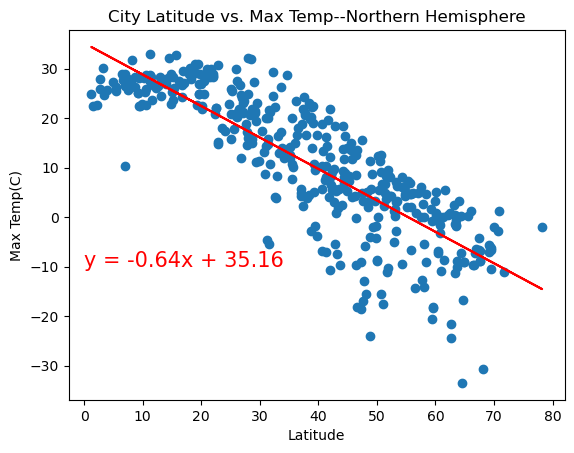

In [167]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Latitude" , "Max Temp(C)", "City Latitude vs. Max Temp--Northern Hemisphere",(0,-10),"NHemiCityvsTemp")

**Discussion about the linear relationship:** This relationship plots the linear relationship between latitude in the various cities across the northern hemisphere to the maximum temperatures in these cities. It can be seen through the regression, that 69.72% of differences in max temperature can be attributed to latitude, with latitudes closer to 0 showing higher max temperatures, and latitudes approaching 90 degrees north (farthest from the equator) showing the lowest max temperatures. This illustrates that the farther north away from the equator, the lower the max temp, and the closer to the equator, the higher the max temp. 

The r-squared is: 0.3875366315273957


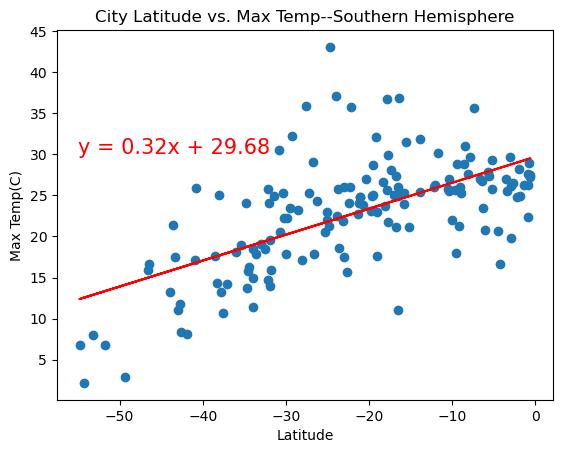

In [168]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Latitude" , "Max Temp(C)", "City Latitude vs. Max Temp--Southern Hemisphere",(-55,30),"SHemiCityvsTemp")

**Discussion about the linear relationship:** This relationship plots the linear relationship between latitude in the various cities across the southern hemisphere to the maximum temperatures in these cities. It can be seen through the regression, that 38.75% of differences in max temperature can be attributed to latitude, with latitudes closer to 0 showing higher max temperatures, and latitudes approaching -60 (farthest from the equator) showing the lowest max temperatures. This illustrates that the farther south away from the equator, the lower the max temp, and the closer to the equator, the higher the max temp. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.07208124999700369


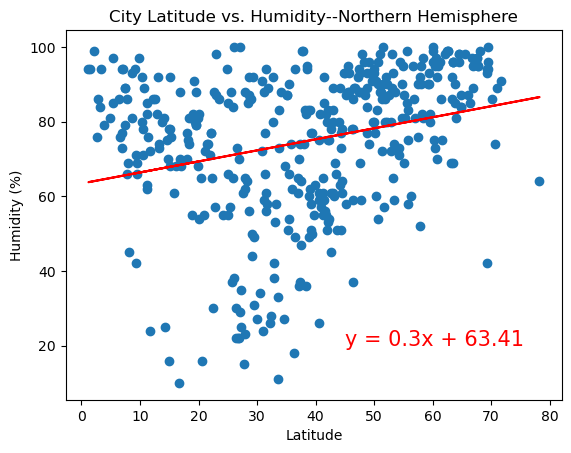

In [169]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Latitude" , "Humidity (%)", "City Latitude vs. Humidity--Northern Hemisphere",(45,20),"NHemiCityvsHumid")
                                                                                                                                                

**Discussion about the linear relationship:** This relationship plots the linear relationship between latitude in the various cities across the northern hemisphere to the humidity % in these cities. It can be seen through the regression, that only 7.21% of differences in humidity can be attributed to latitude differences. This would indicate that in the northern hemisphere, there is no statistically significant correlation between latitude above the equator and humidity %.

The r-squared is: 0.05180082187276316


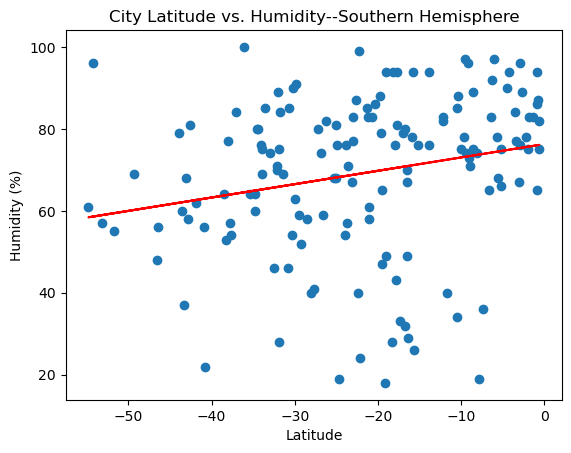

In [170]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Latitude" , "Humidity (%)", "City Latitude vs. Humidity--Southern Hemisphere",(-25,5),"SHemiCityvsHumid")

**Discussion about the linear relationship:** This relationship plots the linear relationship between latitude in the various cities across the southern hemisphere to the humidity % in these cities. It can be seen through the regression, that only 5.18% of differences in humidity can be attributed to latitude differences. This would indicate that in the southern hemisphere, there is no statistically significant correlation between latitude above the equator and humidity %.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.021415593178082643


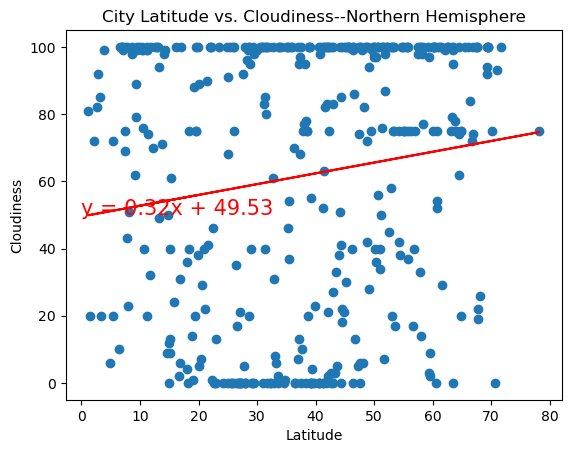

In [171]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Latitude" , "Cloudiness", "City Latitude vs. Cloudiness--Northern Hemisphere",(0,50),"NHemiCityvsCloudy")

**Discussion about the linear relationship:** This relationship plots the linear relationship between latitude in the various cities across the northern hemisphere to the cloudiness in these cities. It can be seen through the regression, that only 2.14% of differences in cloudiness can be attributed to latitude differences. This would indicate that in the northern hemisphere, there is no statistically significant correlation between latitude above the equator and cloudiness.

The r-squared is: 0.049318549998471684


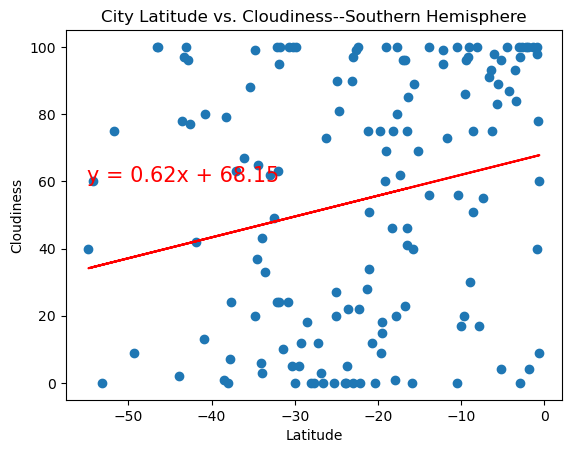

In [172]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Latitude" , "Cloudiness", "City Latitude vs. Cloudiness--Southern Hemisphere",(-55,60),"SHemiCityvsCloudy")
                                                                                                                                                

**Discussion about the linear relationship:** This relationship plots the linear relationship between latitude in the various cities across the southern hemisphere to the cloudiness in these cities. It can be seen through the regression, that only 4.93% of differences in cloudiness can be attributed to latitude differences. This would indicate that in the southern hemisphere, there is no statistically significant correlation between latitude below the equator and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.006550616138347226


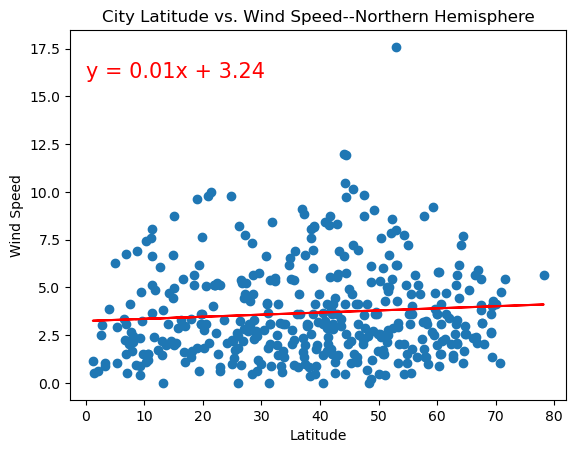

In [173]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Latitude" , "Wind Speed", "City Latitude vs. Wind Speed--Northern Hemisphere",(0,16),"NHemiCityvsWindy")

**Discussion about the linear relationship:** This relationship plots the linear relationship between latitude in the various cities across the northern hemisphere to the windspeed in these cities. It can be seen through the regression, that only 0.66% of differences in wind speed can be attributed to latitude differences. This would indicate that in the northern hemisphere, there is no statistically significant correlation between latitude above the equator and wind speed.

The r-squared is: 0.07434110709890068


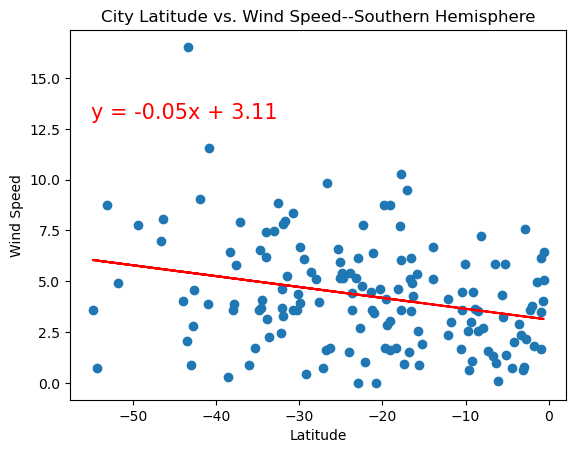

In [174]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Latitude" , "Wind Speed", "City Latitude vs. Wind Speed--Southern Hemisphere",(-55,13),"SHemiCityvsWindy")

**Discussion about the linear relationship:** This relationship plots the linear relationship between latitude in the various cities across the southern hemisphere to the windspeed in these cities. It can be seen through the regression, that 7.43% of differences in wind speed can be attributed to latitude differences. While significantly above the analysis in the northern hemisphere, this would still indicate no statistically significant correlation between latitude below the equator and wind speed.